<a href="https://colab.research.google.com/github/life-ofpi/2024_DL/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FashionMNIST data를 활용하여 아래 질문들에 대한 코드와 답 작성과제

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt
import numpy as np

1.data를 8:1:1로 train / validation / test로 분리하고 2 hidden layer MLP 모델을 training 시키고 train / validation / test에 대한 accuracy를 각각 구하세요

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# 8:1:1로 분리
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoader 생성
train_loader = DataLoader(train_dataset, shuffle=True)
val_loader = DataLoader(val_dataset, shuffle=False)
test_loader = DataLoader(test_dataset, shuffle=False)


100%|██████████| 26421880/26421880 [00:12<00:00, 2145918.92it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 213916.71it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3959789.91it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 25674526.74it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# MLP 모델 정의 (2 hidden layers, 512 units each)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.linear(x)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.001
epochs = 10
model = MLP().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Training
def train(model, train_loader, val_loader, test_loader, epochs, optimizer, criterion):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        for batch in train_loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        train_acc, train_loss = evaluate(model, train_loader)
        val_acc, val_loss = evaluate(model, val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch + 1}/{epochs} - "
              f"Train Loss: {train_loss:.4f} - Train Accuracy: {train_acc:.4f} - "
              f"Val Loss: {val_loss:.4f} - Val Accuracy: {val_acc:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    criterion = torch.nn.CrossEntropyLoss().to(device)
    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    avg_loss = running_loss / len(data_loader)
    return accuracy, avg_loss

#train이랑 valid accuracy와 loss
train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, val_loader, test_loader, epochs, optimizer, criterion)
#test set 성능
test_acc, _ = evaluate(model, test_loader)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10 - Train Loss: 0.4815 - Train Accuracy: 0.8333 - Val Loss: 0.4827 - Val Accuracy: 0.8330
Epoch 2/10 - Train Loss: 0.4220 - Train Accuracy: 0.8511 - Val Loss: 0.4343 - Val Accuracy: 0.8468
Epoch 3/10 - Train Loss: 0.4029 - Train Accuracy: 0.8545 - Val Loss: 0.4217 - Val Accuracy: 0.8518
Epoch 4/10 - Train Loss: 0.3668 - Train Accuracy: 0.8679 - Val Loss: 0.3922 - Val Accuracy: 0.8607
Epoch 5/10 - Train Loss: 0.3397 - Train Accuracy: 0.8761 - Val Loss: 0.3629 - Val Accuracy: 0.8680
Epoch 6/10 - Train Loss: 0.3188 - Train Accuracy: 0.8844 - Val Loss: 0.3489 - Val Accuracy: 0.8745
Epoch 7/10 - Train Loss: 0.3219 - Train Accuracy: 0.8827 - Val Loss: 0.3609 - Val Accuracy: 0.8700
Epoch 8/10 - Train Loss: 0.2835 - Train Accuracy: 0.8969 - Val Loss: 0.3234 - Val Accuracy: 0.8863
Epoch 9/10 - Train Loss: 0.2941 - Train Accuracy: 0.8937 - Val Loss: 0.3366 - Val Accuracy: 0.8765
Epoch 10/10 - Train Loss: 0.2762 - Train Accuracy: 0.8986 - Val Loss: 0.3331 - Val Accuracy: 0.8763
Final Tes

2.minibatch를 사용한 SGD로 코드를 수정하고 train / validation / test에 대한 accuracy를 구하세요

In [ ]:
# 미니배치
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.001
epochs = 10
model = MLP().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr) #SGD 사용

#train,val 정확도
train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, val_loader, test_loader, epochs, optimizer, criterion)
#test정확도
test_acc, _ = evaluate(model, test_loader)
print(f"Final Test Accuracy: {test_acc:.4f}")


Epoch 1/10 - Train Loss: 2.1874 - Train Accuracy: 0.4229 - Val Loss: 2.1873 - Val Accuracy: 0.4227
Epoch 2/10 - Train Loss: 2.0121 - Train Accuracy: 0.5677 - Val Loss: 2.0114 - Val Accuracy: 0.5627
Epoch 3/10 - Train Loss: 1.7310 - Train Accuracy: 0.6016 - Val Loss: 1.7299 - Val Accuracy: 0.5952
Epoch 4/10 - Train Loss: 1.4390 - Train Accuracy: 0.6226 - Val Loss: 1.4367 - Val Accuracy: 0.6272
Epoch 5/10 - Train Loss: 1.2316 - Train Accuracy: 0.6370 - Val Loss: 1.2283 - Val Accuracy: 0.6407
Epoch 6/10 - Train Loss: 1.0934 - Train Accuracy: 0.6570 - Val Loss: 1.0895 - Val Accuracy: 0.6608
Epoch 7/10 - Train Loss: 0.9980 - Train Accuracy: 0.6730 - Val Loss: 0.9939 - Val Accuracy: 0.6708
Epoch 8/10 - Train Loss: 0.9295 - Train Accuracy: 0.6742 - Val Loss: 0.9262 - Val Accuracy: 0.6723
Epoch 9/10 - Train Loss: 0.8772 - Train Accuracy: 0.6915 - Val Loss: 0.8743 - Val Accuracy: 0.6892
Epoch 10/10 - Train Loss: 0.8365 - Train Accuracy: 0.7040 - Val Loss: 0.8338 - Val Accuracy: 0.7000
Final Tes

3.data normalization을 적용 했을 때 어떤 변화가 있는지 epoch / loss plot을 그려서 비교하세요

In [ ]:
#이미지 data normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) #mean, std
])

dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.001
epochs = 10
model = MLP().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
#accuracy
train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, val_loader, test_loader, epochs, optimizer, criterion)

Epoch 1/10 - Train Loss: 1.8494 - Train Accuracy: 0.5444 - Val Loss: 1.8490 - Val Accuracy: 0.5408
Epoch 2/10 - Train Loss: 1.3106 - Train Accuracy: 0.6501 - Val Loss: 1.3063 - Val Accuracy: 0.6505
Epoch 3/10 - Train Loss: 1.0091 - Train Accuracy: 0.7112 - Val Loss: 1.0013 - Val Accuracy: 0.7232
Epoch 4/10 - Train Loss: 0.8562 - Train Accuracy: 0.7324 - Val Loss: 0.8448 - Val Accuracy: 0.7433
Epoch 5/10 - Train Loss: 0.7704 - Train Accuracy: 0.7444 - Val Loss: 0.7557 - Val Accuracy: 0.7528
Epoch 6/10 - Train Loss: 0.7166 - Train Accuracy: 0.7524 - Val Loss: 0.6992 - Val Accuracy: 0.7605
Epoch 7/10 - Train Loss: 0.6792 - Train Accuracy: 0.7605 - Val Loss: 0.6598 - Val Accuracy: 0.7697
Epoch 8/10 - Train Loss: 0.6511 - Train Accuracy: 0.7683 - Val Loss: 0.6300 - Val Accuracy: 0.7767
Epoch 9/10 - Train Loss: 0.6284 - Train Accuracy: 0.7757 - Val Loss: 0.6062 - Val Accuracy: 0.7848
Epoch 10/10 - Train Loss: 0.6094 - Train Accuracy: 0.7825 - Val Loss: 0.5863 - Val Accuracy: 0.7932


4.optimizer를 SGD / SGD+Momentum / SGD+Nestrov Momentum / AdaGrad / RMSProp / Adam 를 사용 하였을 때 어떤 결 과가 있는지 epoch / loss plot을 그려서 비교하세요. (하나의 plot에 나오도록 해야함)

Epoch 1/10 - Train Loss: 1.8448 - Train Accuracy: 0.5374 - Val Loss: 1.8419 - Val Accuracy: 0.5422
Epoch 2/10 - Train Loss: 1.3073 - Train Accuracy: 0.6664 - Val Loss: 1.3065 - Val Accuracy: 0.6683
Epoch 3/10 - Train Loss: 1.0111 - Train Accuracy: 0.7175 - Val Loss: 1.0153 - Val Accuracy: 0.7138
Epoch 4/10 - Train Loss: 0.8596 - Train Accuracy: 0.7325 - Val Loss: 0.8658 - Val Accuracy: 0.7313
Epoch 5/10 - Train Loss: 0.7731 - Train Accuracy: 0.7439 - Val Loss: 0.7810 - Val Accuracy: 0.7428
Epoch 6/10 - Train Loss: 0.7183 - Train Accuracy: 0.7519 - Val Loss: 0.7270 - Val Accuracy: 0.7493
Epoch 7/10 - Train Loss: 0.6804 - Train Accuracy: 0.7594 - Val Loss: 0.6902 - Val Accuracy: 0.7568
Epoch 8/10 - Train Loss: 0.6521 - Train Accuracy: 0.7672 - Val Loss: 0.6618 - Val Accuracy: 0.7640
Epoch 9/10 - Train Loss: 0.6294 - Train Accuracy: 0.7738 - Val Loss: 0.6400 - Val Accuracy: 0.7712
Epoch 10/10 - Train Loss: 0.6104 - Train Accuracy: 0.7790 - Val Loss: 0.6215 - Val Accuracy: 0.7793
Epoch 1/1

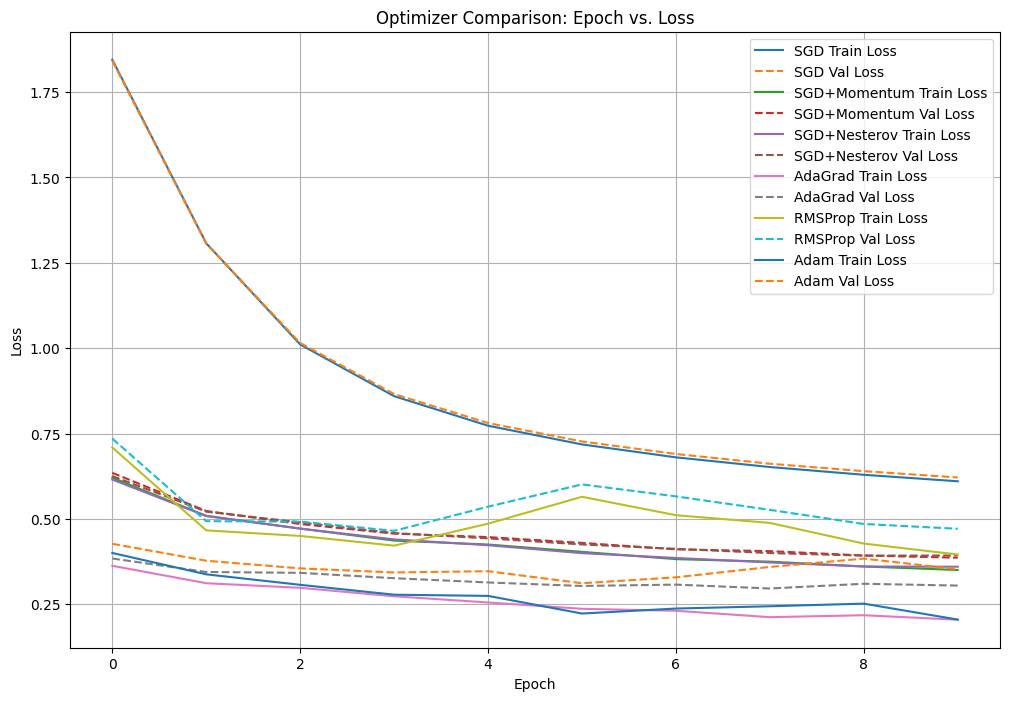

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 데이터 로더 생성
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.linear(x)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.001
epochs = 10
criterion = torch.nn.CrossEntropyLoss().to(device)

# optimizer 목록 정의
optimizers = {
    'SGD': optim.SGD,
    'SGD+Momentum': lambda params: optim.SGD(params, lr=lr, momentum=0.9),
    'SGD+Nesterov': lambda params: optim.SGD(params, lr=lr, momentum=0.9, nesterov=True),
    'AdaGrad': optim.Adagrad,
    'RMSProp': optim.RMSprop,
    'Adam': optim.Adam
}

# 결과 저장을 위한 dictionary 초기화
results = {key: {'train_losses': [], 'val_losses': []} for key in optimizers.keys()}

# 개별 optimizer 학습&평가
for key, opt_fn in optimizers.items():
    model = MLP().to(device)
    optimizer = opt_fn(model.parameters())
    train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, val_loader, test_loader, epochs, optimizer, criterion)
    results[key]['train_losses'] = train_losses
    results[key]['val_losses'] = val_losses

#plot
plt.figure(figsize=(12, 8))
for key, result in results.items():
    plt.plot(range(epochs), result['train_losses'], label=f'{key} Train Loss')
    plt.plot(range(epochs), result['val_losses'], label=f'{key} Val Loss', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Optimizer Comparison: Epoch vs. Loss')
plt.legend()
plt.grid(True)
plt.show()


5.Dropout을 적용했을 때 성능 변화를 epoch / loss / accuracy를 사용하여 비교 하세요

In [ ]:
#Dropout적용
class MLP_dropout(nn.Module):
    def __init__(self):
        super(MLP_dropout, self).__init__()
        self.linear = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.linear(x)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.001
epochs = 10
model = MLP_dropout().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

#accuracy
train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, val_loader, test_loader, epochs, optimizer, criterion)
test_acc, _ = evaluate(model, test_loader)
print(f"Final Test Accuracy: {test_acc:.4f}")

Epoch 1/10 - Train Loss: 1.9550 - Train Accuracy: 0.5006 - Val Loss: 1.9538 - Val Accuracy: 0.5067
Epoch 2/10 - Train Loss: 1.4585 - Train Accuracy: 0.5890 - Val Loss: 1.4572 - Val Accuracy: 0.5928
Epoch 3/10 - Train Loss: 1.1280 - Train Accuracy: 0.6912 - Val Loss: 1.1309 - Val Accuracy: 0.6890
Epoch 4/10 - Train Loss: 0.9495 - Train Accuracy: 0.7150 - Val Loss: 0.9543 - Val Accuracy: 0.7172
Epoch 5/10 - Train Loss: 0.8439 - Train Accuracy: 0.7311 - Val Loss: 0.8508 - Val Accuracy: 0.7318
Epoch 6/10 - Train Loss: 0.7764 - Train Accuracy: 0.7370 - Val Loss: 0.7848 - Val Accuracy: 0.7382
Epoch 7/10 - Train Loss: 0.7307 - Train Accuracy: 0.7458 - Val Loss: 0.7389 - Val Accuracy: 0.7468
Epoch 8/10 - Train Loss: 0.6984 - Train Accuracy: 0.7515 - Val Loss: 0.7079 - Val Accuracy: 0.7498
Epoch 9/10 - Train Loss: 0.6722 - Train Accuracy: 0.7569 - Val Loss: 0.6820 - Val Accuracy: 0.7562
Epoch 10/10 - Train Loss: 0.6524 - Train Accuracy: 0.7620 - Val Loss: 0.6626 - Val Accuracy: 0.7608
Final Tes

6.MLP model에 batch normalization layer를 추가 했을 때 어떤 변화가 있는지 답하세요.

In [ ]:
#MLP에 batch normalization 추가
class MLP_batchnorm(nn.Module):
    def __init__(self):
        super(MLP_batchnorm, self).__init__()
        self.linear = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.linear(x)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.001
epochs = 10
model = MLP_batchnorm().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

#accuracy
train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, val_loader, test_loader, epochs, optimizer, criterion)
test_acc, _ = evaluate(model, test_loader)
print(f"Final Test Accuracy: {test_acc:.4f}")

Epoch 1/10 - Train Loss: 0.6900 - Train Accuracy: 0.7851 - Val Loss: 0.7013 - Val Accuracy: 0.7838
Epoch 2/10 - Train Loss: 0.5596 - Train Accuracy: 0.8150 - Val Loss: 0.5721 - Val Accuracy: 0.8150
Epoch 3/10 - Train Loss: 0.4971 - Train Accuracy: 0.8319 - Val Loss: 0.5106 - Val Accuracy: 0.8313
Epoch 4/10 - Train Loss: 0.4576 - Train Accuracy: 0.8432 - Val Loss: 0.4725 - Val Accuracy: 0.8403
Epoch 5/10 - Train Loss: 0.4310 - Train Accuracy: 0.8522 - Val Loss: 0.4487 - Val Accuracy: 0.8492
Epoch 6/10 - Train Loss: 0.4094 - Train Accuracy: 0.8591 - Val Loss: 0.4297 - Val Accuracy: 0.8572
Epoch 7/10 - Train Loss: 0.3946 - Train Accuracy: 0.8634 - Val Loss: 0.4168 - Val Accuracy: 0.8602
Epoch 8/10 - Train Loss: 0.3796 - Train Accuracy: 0.8686 - Val Loss: 0.4056 - Val Accuracy: 0.8618
Epoch 9/10 - Train Loss: 0.3685 - Train Accuracy: 0.8729 - Val Loss: 0.3968 - Val Accuracy: 0.8653
Epoch 10/10 - Train Loss: 0.3572 - Train Accuracy: 0.8760 - Val Loss: 0.3878 - Val Accuracy: 0.8668
Final Tes

7.위의 방법들과 hyper parameter tuning을 통해 모델의 성능을 향상시키고 결과를 report하세요.

In [ ]:
#mlp가 괜찮은 성능
class MLP_batchnorm(nn.Module):
    def __init__(self):
        super(MLP_batchnorm, self).__init__()
        self.linear = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 10))

    def forward(self, x):
        return self.linear(x)

In [ ]:
#adam,lr=0.002일때 성능 향상
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.002
epochs = 10
model = MLP_batchnorm().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # SGD -> Adam

#train 정확도
train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, val_loader, test_loader, epochs, optimizer, criterion)

#test 정확도
test_acc, _ = evaluate(model, test_loader)
print(f"Final Test Accuracy: {test_acc:.4f}")

Epoch 1/10 - Train Loss: 0.3475 - Train Accuracy: 0.8736 - Val Loss: 0.3866 - Val Accuracy: 0.8627
Epoch 2/10 - Train Loss: 0.2978 - Train Accuracy: 0.8905 - Val Loss: 0.3463 - Val Accuracy: 0.8720
Epoch 3/10 - Train Loss: 0.2694 - Train Accuracy: 0.8984 - Val Loss: 0.3293 - Val Accuracy: 0.8793
Epoch 4/10 - Train Loss: 0.2450 - Train Accuracy: 0.9098 - Val Loss: 0.3181 - Val Accuracy: 0.8862
Epoch 5/10 - Train Loss: 0.2144 - Train Accuracy: 0.9191 - Val Loss: 0.3069 - Val Accuracy: 0.8887
Epoch 6/10 - Train Loss: 0.2096 - Train Accuracy: 0.9221 - Val Loss: 0.3132 - Val Accuracy: 0.8877
Epoch 7/10 - Train Loss: 0.2066 - Train Accuracy: 0.9225 - Val Loss: 0.3133 - Val Accuracy: 0.8885
Epoch 8/10 - Train Loss: 0.1714 - Train Accuracy: 0.9372 - Val Loss: 0.3003 - Val Accuracy: 0.8937
Epoch 9/10 - Train Loss: 0.1887 - Train Accuracy: 0.9276 - Val Loss: 0.3446 - Val Accuracy: 0.8837
Epoch 10/10 - Train Loss: 0.1611 - Train Accuracy: 0.9399 - Val Loss: 0.3200 - Val Accuracy: 0.8902
Final Tes